# Setup

**Imports**

In [ ]:
!pip install loadmydata
!pip install dtw-python

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for loadmydata: filename=loadmydata-0.0.9-py3-none-any.whl size=17910 sha256=82f73fb3dc475678a4346af2b376b0907cf69f42f280b6e24e5b1c3662fdc1df
  Stored in directory: /root/.cache/pip/wheels/b9/8d/92/adbc1c5d09f8492ea5c2dfd6b66f57d267d4ccb618ae3481ed
Successfully built loadmydata
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 661.4/661.4 KB 11.8 MB/s eta 0:00:00


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from loadmydata.load_human_locomotion import (
    load_human_locomotion_dataset,
    get_code_list,
)

**Utility functions**

In [ ]:
def fig_ax(figsize=(15, 5)):
    fig, ax = plt.subplots(figsize=figsize)
    ax.autoscale(enable=True, axis='x', tight=True)
    return fig, ax

# Spectral feature

## Question 6

In [ ]:
import statsmodels.api as sm

In [ ]:
N = [200, 500, 1000]
avs = []
stds = []
for n in N:
  x = np.random.randn(100, n)
  gamma = np.zeros((100, n))
  for i in range(100):
    gamma[i, :] = sm.tsa.stattools.acovf(x[i])
  avs.append(gamma.mean(axis=0))
  stds.append(gamma.std(axis=0))

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/stattools.py:441: FutureWarning: fft=True will become the default after the release of the 0.12 release of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(msg, FutureWarning)


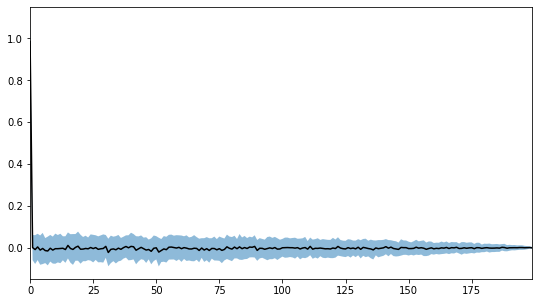

In [ ]:
fig, ax = fig_ax(figsize=(9, 5))

avg = avs[0]
std = stds[0]
ax.plot(np.arange(0, 200), avg, 'k-')
ax.fill_between(np.arange(0, 200), avg-std, avg+std, alpha=0.5);

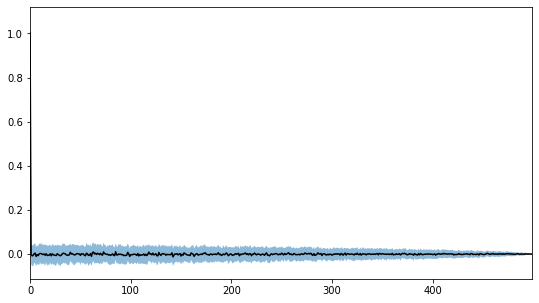

In [ ]:
fig, ax = fig_ax(figsize=(9, 5))

avg = avs[1]
std = stds[1]
ax.plot(np.arange(0, 500), avg, 'k-')
ax.fill_between(np.arange(0, 500), avg-std, avg+std, alpha=0.5);

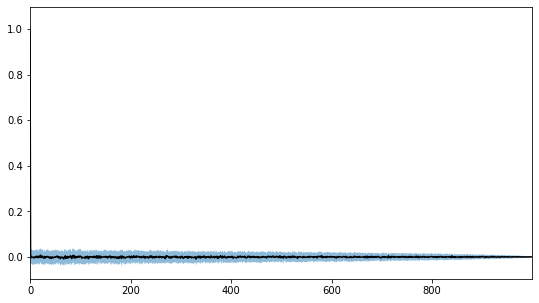

In [ ]:
fig, ax = fig_ax(figsize=(9, 5))

avg = avs[2]
std = stds[2]
ax.plot(np.arange(0, 1000), avg, 'k-')
ax.fill_between(np.arange(0, 1000), avg-std, avg+std, alpha=0.5);

In [ ]:
import scipy

In [ ]:
N = [200, 500, 1000]
fs = 1
avs = []
stds = []
for n in N:
  x = np.random.randn(100, n)
  periodogram = np.zeros((100, n // 2 + 1))
  for i in range(100):
    periodogram[i, :] = scipy.signal.periodogram(x[i], fs=fs)[1]
  avs.append(periodogram.mean(axis=0))
  stds.append(periodogram.std(axis=0))

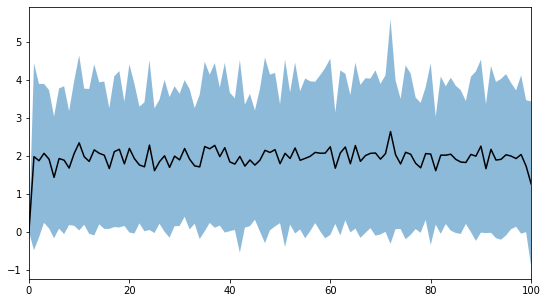

In [ ]:
fig, ax = fig_ax(figsize=(9, 5))
freqs = np.linspace(0, fs / 2, n)

avg = avs[0]
std = stds[0]
ax.plot(np.arange(101), avg, 'k-')
ax.fill_between(np.arange(101), avg-std, avg+std, alpha=0.5);

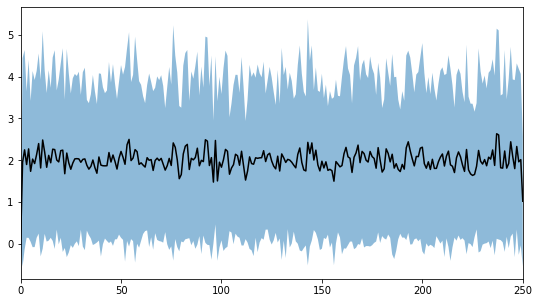

In [ ]:
fig, ax = fig_ax(figsize=(9, 5))
freqs = np.linspace(0, fs / 2, n)

avg = avs[1]
std = stds[1]
ax.plot(np.arange(avg.shape[0]), avg, 'k-')
ax.fill_between(np.arange(avg.shape[0]), avg-std, avg+std, alpha=0.5);

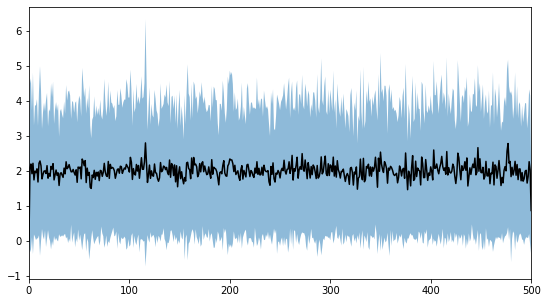

In [ ]:
fig, ax = fig_ax(figsize=(9, 5))
freqs = np.linspace(0, fs / 2, n)

avg = avs[2]
std = stds[2]
ax.plot(np.arange(avg.shape[0]), avg, 'k-')
ax.fill_between(np.arange(avg.shape[0]), avg-std, avg+std, alpha=0.5);

## Question 9

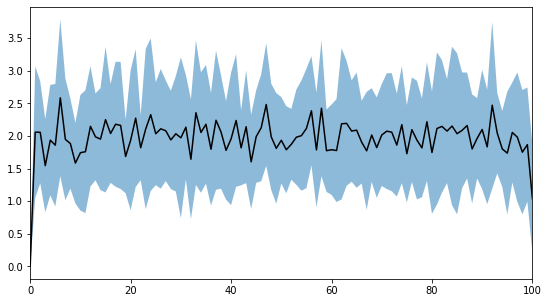

In [ ]:
N = [200, 500, 1000]
fs = 1
avs = []
stds = []
K = 5
for n in N:
  x = np.random.randn(100, n)
  periodogram_big = np.zeros((20, n // 2 + 1))
  for k in range(K):
    periodogram = np.zeros((20, n // 2 + 1))
    for i in range(20*k, 20*(k+1)):
      periodogram[i-20*k, :] = scipy.signal.periodogram(x[i], fs=fs)[1]
    periodogram_big+=periodogram/K
  avs.append(periodogram_big.mean(axis=0))
  stds.append(periodogram_big.std(axis=0))
fig, ax = fig_ax(figsize=(9, 5))
freqs = np.linspace(0, fs / 2, n)

avg = avs[0]
std = stds[0]
ax.plot(np.arange(101), avg, 'k-')
ax.fill_between(np.arange(101), avg-std, avg+std, alpha=0.5);

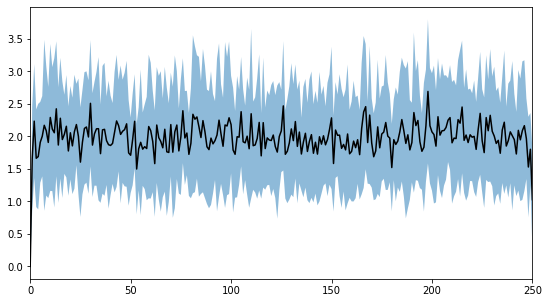

In [ ]:
fig, ax = fig_ax(figsize=(9, 5))
freqs = np.linspace(0, fs / 2, n)

avg = avs[1]
std = stds[1]
ax.plot(np.arange(avg.shape[0]), avg, 'k-')
ax.fill_between(np.arange(avg.shape[0]), avg-std, avg+std, alpha=0.5);

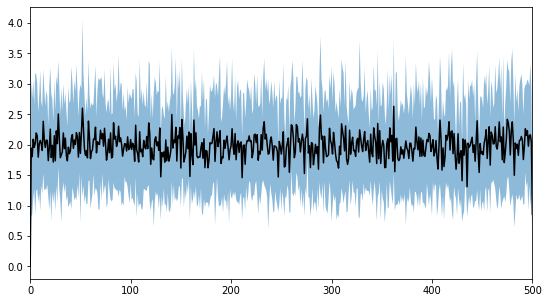

In [ ]:
fig, ax = fig_ax(figsize=(9, 5))
freqs = np.linspace(0, fs / 2, n)

avg = avs[2]
std = stds[2]
ax.plot(np.arange(avg.shape[0]), avg, 'k-')
ax.fill_between(np.arange(avg.shape[0]), avg-std, avg+std, alpha=0.5);

# Dynamic time warping (DTW)

## Data

This data set consists of signals collected with inertial measurement units (accelerometer+gyroscope), from 230 subjects undergoing a fixed protocol:
- standing still,
- walking 10 m,
- turning around,
- walking back,
- stopping.

In this assignment, we only consider the vertical acceleration of the left foot and all signals are truncated to 20 seconds (as a result, they all have same length). Signals are sampled at 100 Hz.

The measured population is composed of healthy subjects as well as patients with neurological or orthopedic disorders.

The start and end time stamps of thousands of footsteps are available.

The data are part of a larger data set described in [1].

[1] Truong, C., Barrois-Müller, R., Moreau, T., Provost, C., Vienne-Jumeau, A., Moreau, A., Vidal, P.-P., Vayatis, N., Buffat, S., Yelnik, A., Ricard, D., & Oudre, L. (2019). A data set for the study of human locomotion with inertial measurements units. Image Processing On Line (IPOL), 9.

**The task** is to classify footsteps in healthy/non-healthy.

The following cell defines the training set `(X_train, y_train)` and testing set `(X_test, y_test)`.

In [ ]:
subset_indexes_train = [95, 619, 441, 149, 951, 803, 214, 34, 37, 630]
subset_indexes_test = [683, 259, 59, 387, 634]

code_list = get_code_list()

X_train = list()  # list of footstep signals
y_train = list()  # list of pathologies (the "labels")

for code in np.take(code_list, subset_indexes_train):
    single_trial = load_human_locomotion_dataset(code)
    signal = single_trial.signal.LAZ.to_numpy()  # keeping only one dimension (from the left sensor)
    steps = single_trial.left_steps
    pathology = single_trial.metadata["PathologyGroup"]
    label = 0 if pathology=="Healthy" else 1  # 0: healthy, 1: non-healthy
    for (start, end) in steps:
        X_train.append(signal[start:end])
        y_train.append(label)

        
X_test = list()  # list of footstep signals
y_test = list()  # list of pathologies (the "labels")

for code in np.take(code_list, subset_indexes_test):
    single_trial = load_human_locomotion_dataset(code)
    signal = single_trial.signal.LAZ.to_numpy()  # keeping only one dimension (from the left sensor)
    steps = single_trial.left_steps
    pathology = single_trial.metadata["PathologyGroup"]
    label = 0 if pathology=="Healthy" else 1  # 0: healthy, 1: non-healthy
    for (start, end) in steps:
        X_test.append(signal[start:end])
        y_test.append(label)

100%|██████████| 202M/202M [05:18<00:00, 633kiB/s]


## Question 10

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from dtw import dtw
from sklearn.metrics import  f1_score
from sklearn.metrics import make_scorer
from sklearn.metrics import classification_report
def equalize(X):
    n = 147
    new_X=[]
    for r in X:
        r = list(r)
        r.extend([-1] * (n - len(r)))
        new_X.append(r)
    return np.array(new_X)
def dtw_dist(s1, s2):
    return dtw(s1,s2).distance
X_train = equalize(X_train)
X_test = equalize(X_test)

Importing the dtw module. When using in academic works please cite:
  T. Giorgino. Computing and Visualizing Dynamic Time Warping Alignments in R: The dtw Package.
  J. Stat. Soft., doi:10.18637/jss.v031.i07.



In [ ]:
model = KNeighborsClassifier(n_neighbors=1,weights='distance',metric=dtw_dist)
grid = GridSearchCV(model, {'n_neighbors':[2, 3, 4, 5, 6, 7, 8]} , cv=5, scoring=make_scorer(f1_score),verbose=1)
grid.fit(X_train,y_train)

print('Top k: ', grid.best_params_['n_neighbors'])
print('Top f1-score: ', grid.best_score_)

Fitting 5 folds for each of 7 candidates, totalling 35 fits
Top k:  4
Top f1-score:  0.7869101643628895


In [ ]:
model = KNeighborsClassifier(n_neighbors=4,weights='distance',metric=dtw_dist)
model.fit(X_train,y_train)
print(classification_report(y_test, model.predict(X_test)))

              precision    recall  f1-score   support

           0       0.06      0.20      0.09        15
           1       0.69      0.37      0.48        73

    accuracy                           0.34        88
   macro avg       0.38      0.28      0.29        88
weighted avg       0.58      0.34      0.42        88



## Question 11

In [ ]:
def get_dtw_distance(signal_1: np.ndarray, signal_2: np.ndarray) -> float:
    return dtw(signal_1,signal_2).distance

def make_square(jagged):
    max_cols = max(map(len, jagged))
    l= []
    for row in jagged:
        row = list(row)
        row.extend([-1] * (max_cols - len(row)))
        l.append(row)
    return np.array(l)

In [ ]:
from sklearn.model_selection import train_test_split
X_train_squared = make_square(X_train)
X_tr, X_te, y_tr, y_te = train_test_split(X_train_squared, y_train, test_size=0.25, random_state=42)

In [ ]:
# Train model using best parameters on train set
clf_best = KNeighborsClassifier(n_neighbors=grid.best_params_['n_neighbors'],weights='distance',metric=get_dtw_distance)
clf_best.fit(X_tr,y_tr) 

# Evaluate best model on test set
y_pred = clf_best.predict(X_te)
print('F1-score on test set = ', f1_score(y_pred,y_te))

F1-score on test set =  0.8780487804878048


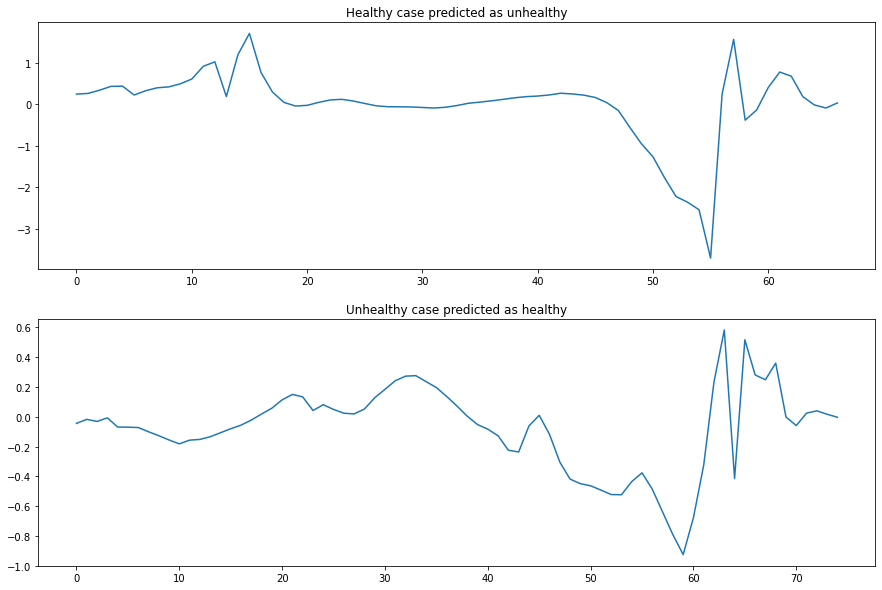

In [ ]:
# Find indices and corresponding true classes of badly classified samples
indices_bad_classification = np.where(y_pred != y_te)[0]
class_bad_classification = np.array(y_te)[indices_bad_classification]

# Badly classified step from healthy class
ind_healthy = np.where(class_bad_classification==0)[0][0]
bad_classif_healthy = X_te[indices_bad_classification[ind_healthy]]
bad_classif_healthy = bad_classif_healthy[np.where(bad_classif_healthy!=-1)]

# Badly classified step from non-healthy class
ind_non_healthy = np.where(class_bad_classification==1)[0][0]
bad_classif_non_healthy = X_te[indices_bad_classification[ind_non_healthy]]
bad_classif_non_healthy = bad_classif_non_healthy[np.where(bad_classif_non_healthy!=-1)]

# Display a badly classified step from each class (healthy/non-healthy)
fig , ax = plt.subplots(2,1,figsize=(15,10))
ax[0].plot(bad_classif_healthy)
ax[0].set_title('Healthy case predicted as unhealthy')
ax[1].plot(bad_classif_non_healthy)
ax[1].set_title('Unhealthy case predicted as healthy')
plt.show()